In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
import re
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [56]:
dataset = pd.read_csv(r'D:\screener_project\ai\lstm\Tweets.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567862586374529026,negative,1.0,Late Flight,0.3612,United,NaN,Tgoody9,NaN,0,@united haha that's fine. Still won't fly @uni...,"[40.69429232, -74.17208436]",2015-02-17 17:46:05 -0800,"Sarasota, Florida",Central Time (US & Canada)
1,568878979576410112,negative,1.0,Late Flight,1.0000,US Airways,NaN,Allisonjones704,NaN,0,@USAirways since when does a maintenance probl...,NaN,2015-02-20 13:04:52 -0800,NaN,NaN
2,569229483288317952,neutral,1.0,NaN,NaN,Southwest,NaN,Kbono91,NaN,0,@SouthwestAir Any chance there's a few seats o...,NaN,2015-02-21 12:17:39 -0800,NaN,NaN
3,569634364780351488,positive,1.0,NaN,NaN,US Airways,NaN,nanceebing,NaN,0,@USAirways please keep Emily at you gso airpor...,NaN,2015-02-22 15:06:30 -0800,south beach/ LA / NC,Eastern Time (US & Canada)
4,569895100526039040,negative,1.0,Flight Booking Problems,0.6495,US Airways,NaN,dan3598328,NaN,0,@USAirways i will be Cancelled Flighting my us...,NaN,2015-02-23 08:22:34 -0800,"Hillsborough, New Jersey",Eastern Time (US & Canada)


In [57]:
dataset.shape

(14640, 15)

In [58]:
dataset = dataset[['airline_sentiment', 'text']]
dataset.head()

,airline_sentiment,text
0,negative,@united haha that's fine. Still won't fly @uni...
1,negative,@USAirways since when does a maintenance probl...
2,neutral,@SouthwestAir Any chance there's a few seats o...
3,positive,@USAirways please keep Emily at you gso airpor...
4,negative,@USAirways i will be Cancelled Flighting my us...


<AxesSubplot:ylabel='Frequency'>

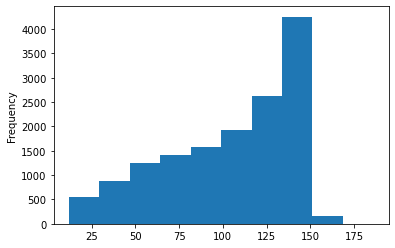

In [59]:
%matplotlib inline
dataset['text'].str.len().plot.hist()

In [60]:
dataset['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:>

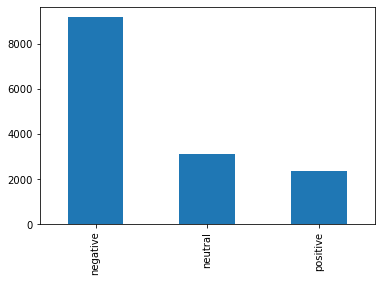

In [61]:
dataset['airline_sentiment'].value_counts().plot.bar()

In [62]:
dataset['text'].apply(lambda x: x.lower())
dataset['text'] = dataset['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', "", x))
dataset['text'].head()

0    united haha thats fine Still wont fly united e...
1    USAirways since when does a maintenance proble...
2    SouthwestAir Any chance theres a few seats ope...
3    USAirways please keep Emily at you gso airport...
4    USAirways i will be Cancelled Flighting my us ...
Name: text, dtype: object

In [63]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(dataset['text'].values)

X = tokenizer.texts_to_sequences(dataset['text'].values)
X = pad_sequences(X)
X[:7]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    5,  883,  172,  714,   72,  211,  106,    5,  159,
         103,  553,   95,    6,  104,   22,   99,  198,  157,  306,  554],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   12,
         225,   58,  207,    4,  581,  325,   10,  309,    8,  176, 3665,
          77,  161,    1,  130,   48, 1784,  225,   38,   81, 1785, 1593],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   16,   94,  436,
         473,    4,  520,  191,  370,   33,  691,    1, 1427,   29,  861],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   12,   73,
         274,   27,    6, 3666,  110, 2718,    9,  208,  185,   14,  349],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   12,    3,   

In [64]:
model = Sequential()
model.add(Embedding(5000, 256, input_length = X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout = 0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.2))
model.add(Dense(3, activation = 'softmax'))


In [65]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 33, 256)           1280000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 33, 256)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 33, 256)           525312    
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [66]:
y = pd.get_dummies(dataset['airline_sentiment']).values
[print(dataset['airline_sentiment'][i], y[i]) for i in range(0,7)]

negative [1 0 0]
negative [1 0 0]
neutral [0 1 0]
positive [0 0 1]
negative [1 0 0]
positive [0 0 1]
neutral [0 1 0]


[None, None, None, None, None, None, None]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 

In [68]:
batch_size = 32
epochs = 10
model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose=2)

Epoch 1/10
366/366 - 86s - loss: 0.6476 - accuracy: 0.7300
Epoch 2/10
366/366 - 85s - loss: 0.4370 - accuracy: 0.8285
Epoch 3/10
366/366 - 86s - loss: 0.3458 - accuracy: 0.8701
Epoch 4/10
366/366 - 86s - loss: 0.2823 - accuracy: 0.8955
Epoch 5/10
366/366 - 86s - loss: 0.2370 - accuracy: 0.9144
Epoch 6/10
366/366 - 87s - loss: 0.1911 - accuracy: 0.9279
Epoch 7/10
366/366 - 86s - loss: 0.1598 - accuracy: 0.9395
Epoch 8/10
366/366 - 87s - loss: 0.1377 - accuracy: 0.9495
Epoch 9/10
366/366 - 86s - loss: 0.1241 - accuracy: 0.9546
Epoch 10/10
366/366 - 87s - loss: 0.1067 - accuracy: 0.9614
